In [22]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_pickle('fits/cluster_results_noise3.pkl')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [23]:
#Rename method kmeans to "Least squares K-means (sign-flipped eigenvectors)"
df['method'] = df['method'].replace('euclidean', 'K-means: Least squares \n(sign-flipped eigenvectors)')
df['method'] = df['method'].replace('diametrical', 'K-means: Diametrical')
df['method'] = df['method'].replace('complex_diametrical', 'K-means: Complex diametrical')
df['method'] = df['method'].replace('grassmann', 'K-means: Grassmann')
df['method'] = df['method'].replace('weighted_grassmann', 'K-means: Weighted Grassmann')
df['method'] = df['method'].replace('Watson', 'Mixture: Watson')
df['method'] = df['method'].replace('Complex_Watson', 'Mixture: Complex Watson')
df['method'] = df['method'].replace('ACG', 'Mixture: ACG')
df['method'] = df['method'].replace('Complex_ACG', 'Mixture: Complex ACG')
# df['method'] = df['method'].replace('Complex_ACG_fullrank_K1', 'Complex ACG mixture (K=1)')
# df['method'] = df['method'].replace('Complex_ACG_fullrank_K3', 'Complex ACG mixture (K=3)')
df['method'] = df['method'].replace('MACG', 'Mixture: MACG')
df['method'] = df['method'].replace('SingularWishart', 'Mixture: Singular Wishart')
df['method'] = df['method'].replace('Normal', 'Mixture: Gaussian')

# loop through the table, and if df['HMM']==True, then df['method'][i] = 'HMM: ' + df['method'][i][:8]
# for i in range(len(df)):
#     if df['HMM'][i]:
#         df['method'][i] = 'HMM: ' + df['method'][i][8:]

In [24]:
import matplotlib.text as mtext
class LegendTitle(object):
    def __init__(self, text_props=None):
        self.text_props = text_props or {}
        super(LegendTitle, self).__init__()

    def legend_artist(self, legend, orig_handle, fontsize, handlebox):
        x0, y0 = handlebox.xdescent, handlebox.ydescent
        title = mtext.Text(x0, y0, orig_handle,  **self.text_props)
        handlebox.add_artist(title)
        return title

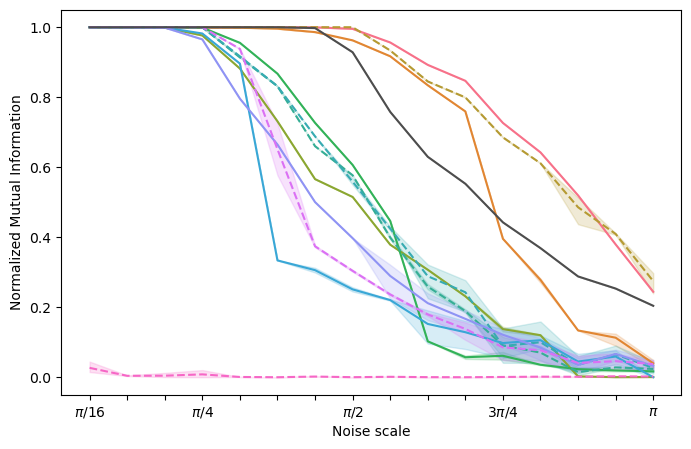

In [25]:
# make a lineplot for each of the unique methods in the column "method". the y-axis value should be the column "nmi". the x-axis should correspond to the column "noise", only the x-axis labels should actually correspond to [pi/4,pi/2,3pi/4,...,2pi]
# g1 = ['Least squares K-means\n(sign-flipped eigenvectors)','Diametrical clustering','Complex diametrical clustering','Grassmann clustering','Weighted Grassmann clustering']
# g2 = ['Watson mixture','Complex Watson mixture','ACG mixture','Complex ACG mixture','MACG mixture','Singular Wishart mixture']
g = ['Mixture: Complex Watson', 'Mixture: Complex ACG','K-means: Complex diametrical',
     'Mixture: MACG','Mixture: Singular Wishart','K-means: Grassmann','K-means: Weighted Grassmann',
     'Mixture: Watson','Mixture: ACG','K-means: Diametrical','K-means: Least squares \n(sign-flipped eigenvectors)',
     'Mixture: Gaussian']

palette = sns.color_palette("husl", n_colors=len(g)-1, desat=1)
#extend palette with black
palette.append((0.3,0.3,0.3))
plt.figure(figsize=(8,5))
ax = plt.gca()
# ax = sns.lineplot(data=df[df['method'].isin(g1)], x='noise', y='nmi', hue='method',ax=ax,palette=palette[:5])
# ax = sns.lineplot(data=df[df['method'].isin(g2)], x='noise', y='nmi', hue='method',ax=ax,palette=palette[5:])
ax = sns.lineplot(data=df[df['method'].isin(g)], x='noise', y='test_nmi', hue='method',ax=ax,palette=palette,hue_order=g,legend=False)
ax.lines[2].set_linestyle("--")
ax.lines[5].set_linestyle("--")
ax.lines[6].set_linestyle("--")
ax.lines[9].set_linestyle("--")
ax.lines[10].set_linestyle("--")
# plt.xticks(range(16), labels=[r'$\pi/16$',r'$\pi/8$',r'$3\pi/16$',r'$\pi/4$',r'$5\pi/16$',r'$3\pi/8$',r'$7\pi/16$',r'$\pi/2$',
#                               r'$9\pi/16$',r'$5\pi/8$',r'$11\pi/16$',r'$3\pi/4$',r'$13\pi/16$',r'$7\pi/8$',r'$15\pi/16$',r'$\pi$'])#
plt.xticks(range(16), labels=[r'$\pi/16$','','',r'$\pi/4$','','','',r'$\pi/2$',
                              '','','',r'$3\pi/4$','','','',r'$\pi$'])#
# plt.xlim(0,3)
plt.ylabel('Normalized Mutual Information')
plt.xlabel('Noise scale')
# plt.title('Clustering performance on 3-dimensional synthetic data', fontsize=16)
#remove title from legend
handles, labels = ax.get_legend_handles_labels()
#add subtitles to handles and labels

# ax.legend(handles=handles2, labels=labels2,
#            handler_map={str: LegendTitle({'fontsize': 16})})
# leg = ax.legend(bbox_to_anchor=(1, 0.80))
# leg_lines = leg.get_lines()
# leg_lines[2].set_linestyle("--")
# leg_lines[5].set_linestyle("--")
# leg_lines[6].set_linestyle("--")
# leg_lines[9].set_linestyle("--")
# leg_lines[10].set_linestyle("--")
plt.savefig('figs/cluster_results_noise.png', bbox_inches='tight', dpi=300)

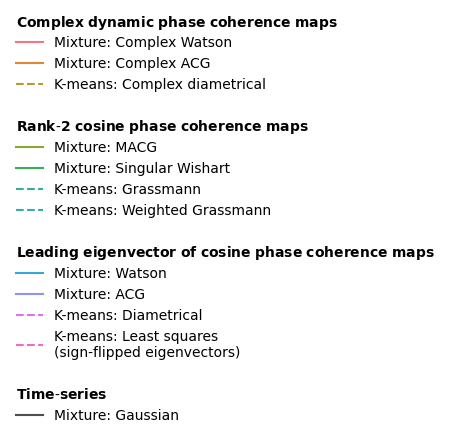

In [26]:
fig,axs = plt.subplots(1,1,figsize=(4,5))
hands = [plt.plot([], color=palette[0],linestyle='--')[0]]

handles2 = ['Complex dynamic phase coherence maps',plt.plot([], color=palette[0])[0],plt.plot([], color=palette[1])[0],plt.plot([], color=palette[2], linestyle='--')[0],
              '','Rank-2 cosine phase coherence maps',plt.plot([], color=palette[3])[0],plt.plot([], color=palette[4])[0],plt.plot([], color=palette[5], linestyle='--')[0],plt.plot([], color=palette[6], linestyle='--')[0],
                '','Leading eigenvector of cosine phase coherence maps',plt.plot([], color=palette[7])[0],plt.plot([], color=palette[8])[0],plt.plot([], color=palette[9], linestyle='--')[0],plt.plot([], color=palette[10], linestyle='--')[0],
                '','Time-series',plt.plot([], color=palette[11])[0]]
# labels2 = ['',g[:3],'',g[3:7],'',g[7:]]
handles2[0] = r'$\bf{Complex}$ $\bf{dynamic}$ $\bf{phase}$ $\bf{coherence}$ $\bf{maps}$'
handles2[5] = r'$\bf{Rank\text{-}2}$ $\bf{cosine}$ $\bf{phase}$ $\bf{coherence}$ $\bf{maps}$'
handles2[11] = r'$\bf{Leading}$ $\bf{eigenvector}$ $\bf{of}$ $\bf{cosine}$ $\bf{phase}$ $\bf{coherence}$ $\bf{maps}$'
handles2[17] = r'$\bf{Time\text{-}series}$'

labels2 = ['',g[0],g[1],g[2],'','',g[3],g[4],g[5],g[6],'','',g[7],g[8],g[9],g[10],'','',g[11]]
axs.legend(handles2, labels2, handler_map={str: LegendTitle({'fontsize': 10})},loc='center',bbox_to_anchor=(0, 0.5),frameon=False)
axs.axis('off');
plt.savefig('figs/cluster_results_noise_legend.png', bbox_inches='tight', dpi=300)

IndexError: list index out of range

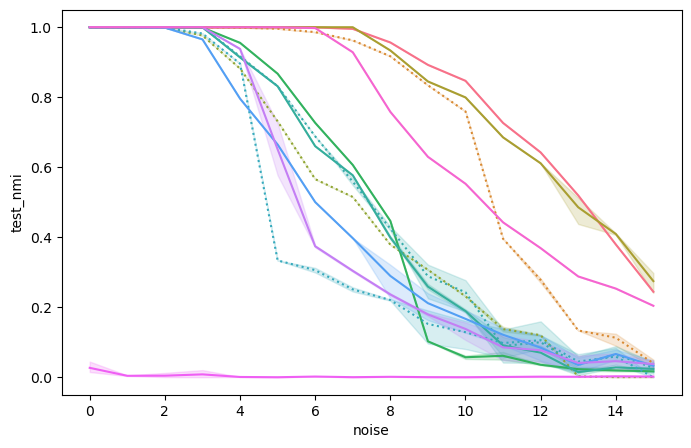

In [27]:
# make a lineplot for each of the unique methods in the column "method". the y-axis value should be the column "nmi". the x-axis should correspond to the column "noise", only the x-axis labels should actually correspond to [pi/4,pi/2,3pi/4,...,2pi]
# g = ['Mixture: Complex Watson', 'Mixture: Complex ACG','K-means: Complex diametrical',
#      'Mixture: MACG','Mixture: Singular Wishart','K-means: Grassmann','K-means: Weighted Grassmann',
#      'Mixture: Watson','Mixture: ACG','K-means: Diametrical','K-means: Least squares \n(sign-flipped eigenvectors)',
#      'Mixture: Gaussian']
g = ['Mixture: Complex Watson','HMM: Complex Watson', 'Mixture: Complex ACG','HMM: Complex ACG','K-means: Complex diametrical',
     'Mixture: MACG', 'HMM: MACG','Mixture: Singular Wishart','HMM: Singular Wishart','K-means: Grassmann','K-means: Weighted Grassmann',
     'Mixture: Watson','HMM: Watson','Mixture: ACG','HMM: ACG','K-means: Diametrical','K-means: Least squares \n(sign-flipped eigenvectors)',
     'Mixture: Gaussian', 'HMM: Gaussian']
HMM_idx = [1,3,6,7,13,15,17,19]
mixture_idx = [0,2,4,5,8,9,12,14,16,18]
Kmeans_idx = [4,9,10,11,15,16]
all_idx = [0,1,0,1,2,0,1,0,1,2,2,0,1,0,1,2,2,0,1]

palette = sns.color_palette("husl", n_colors=len(g), desat=1)
plt.figure(figsize=(8,5))
ax = plt.gca()
# ax = sns.lineplot(data=df[df['method'].isin(g1)], x='noise', y='nmi', hue='method',ax=ax,palette=palette[:5])
# ax = sns.lineplot(data=df[df['method'].isin(g2)], x='noise', y='nmi', hue='method',ax=ax,palette=palette[5:])
ax = sns.lineplot(data=df[df['method'].isin(g)], x='noise', y='test_nmi', hue='method',ax=ax,palette=palette,hue_order=g,legend=False)
# ax.lines[2].set_linestyle("--")
# ax.lines[5].set_linestyle("--")
# ax.lines[6].set_linestyle("--")
# ax.lines[9].set_linestyle("--")
# ax.lines[10].set_linestyle("--")

for i in HMM_idx:
    ax.lines[i].set_linestyle(":")
for i in mixture_idx:
     ax.lines[i].set_linestyle("-")
for i in Kmeans_idx:
     ax.lines[i].set_linestyle("--")

plt.xticks(range(16), labels=[r'$\pi/16$','','',r'$\pi/4$','','','',r'$\pi/2$',
                              '','','',r'$3\pi/4$','','','',r'$\pi$'])#
# plt.xlim(0,3)
plt.ylabel('Test normalized mutual information')
plt.xlabel('Noise scale')
# plt.title('Clustering performance on 3-dimensional synthetic data', fontsize=16)
#remove title from legend
handles, labels = ax.get_legend_handles_labels()
plt.savefig('figs/cluster_results_noise_HMM.png', bbox_inches='tight', dpi=300)

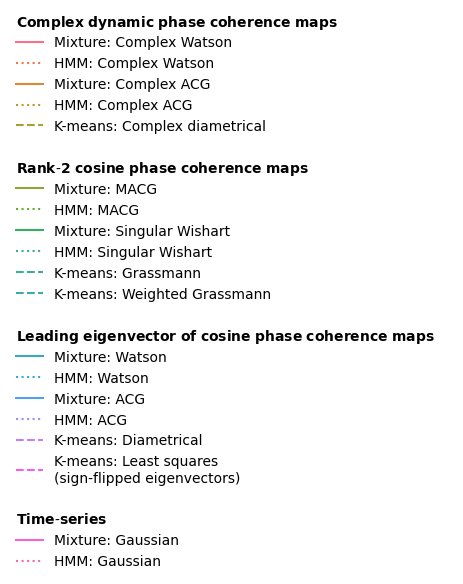

In [16]:
fig,axs = plt.subplots(1,1,figsize=(4,5))
hands = [plt.plot([], color=palette[0],linestyle='--')[0]]

# handles2 = [r'$\bf{Complex}$ $\bf{dynamic}$ $\bf{phase}$ $\bf{coherence}$ $\bf{maps}$',plt.plot([], color=palette[0])[0],plt.plot([], color=palette[1])[0],plt.plot([], color=palette[2], linestyle='--')[0],
#               '',r'$\bf{Rank\text{-}2}$ $\bf{cosine}$ $\bf{phase}$ $\bf{coherence}$ $\bf{maps}$',plt.plot([], color=palette[3])[0],plt.plot([], color=palette[4])[0],plt.plot([], color=palette[5], linestyle='--')[0],plt.plot([], color=palette[6], linestyle='--')[0],
#                 '',r'$\bf{Leading}$ $\bf{eigenvector}$ $\bf{of}$ $\bf{cosine}$ $\bf{phase}$ $\bf{coherence}$ $\bf{maps}$',plt.plot([], color=palette[7])[0],plt.plot([], color=palette[8])[0],plt.plot([], color=palette[9], linestyle='--')[0],plt.plot([], color=palette[10], linestyle='--')[0],
#                 '',r'$\bf{Time\text{-}series}$',plt.plot([], color=palette[11])[0]]

new_idx = [1,2,3,4,5,8,9,10,11,12,13,16,17,18,19,20,21,24,25]
handles_list = []
labels_list = []
for i in range(26):
    handles_list.append('')
    labels_list.append('')
linestyles = ['-',':','--']
for i,idx in enumerate(all_idx):
    handles_list[new_idx[i]] = plt.plot([], color=palette[i],linestyle=linestyles[idx])[0]
    labels_list[new_idx[i]] = g[i]
handles_list[0] = r'$\bf{Complex}$ $\bf{dynamic}$ $\bf{phase}$ $\bf{coherence}$ $\bf{maps}$'
handles_list[7] = r'$\bf{Rank\text{-}2}$ $\bf{cosine}$ $\bf{phase}$ $\bf{coherence}$ $\bf{maps}$'
handles_list[15] = r'$\bf{Leading}$ $\bf{eigenvector}$ $\bf{of}$ $\bf{cosine}$ $\bf{phase}$ $\bf{coherence}$ $\bf{maps}$'
handles_list[23] = r'$\bf{Time\text{-}series}$'

# make the first handle bold face without removing spaces

# handles2[0] = r'$\bf{'+handles2[0]+'}$'
# labels2 = ['',g[:3],'',g[3:7],'',g[7:]]
labels2 = ['',g[0],g[1],g[2],'','',g[3],g[4],g[5],g[6],'','',g[7],g[8],g[9],g[10],'','',g[11]]
axs.legend(handles_list, labels_list, handler_map={str: LegendTitle({'fontsize': 10})},loc='center',bbox_to_anchor=(0, 0.5),frameon=False)
axs.axis('off');
plt.savefig('figs/cluster_results_noise_legend.png', bbox_inches='tight', dpi=300)

In [9]:
handles_list

['$\\bf{Complex}$ $\\bf{dynamic}$ $\\bf{phase}$ $\\bf{coherence}$ $\\bf{maps}$',
 '$\\bf{Rank\\text{-}2}$ $\\bf{cosine}$ $\\bf{phase}$ $\\bf{coherence}$ $\\bf{maps}$',
 '',
 '$\\bf{Leading}$ $\\bf{eigenvector}$ $\\bf{of}$ $\\bf{cosine}$ $\\bf{phase}$ $\\bf{coherence}$ $\\bf{maps}$',
 '',
 '',
 '$\\bf{Time\\text{-}series}$',
 '',
 '',